# Scikit-Learn 맛보기
## Iris 분류 - 결정트리, 서포트벡터머신(SVM), 로지스틱 회귀


### 1. 데이터 전처리

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
type(iris)

sklearn.utils.Bunch

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
# Feature data - X, numpy dimensional array
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
type(iris.data)

numpy.ndarray

In [ ]:
# Feature name
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
import pandas as pd
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
feature_names = [name[:-5] for name in iris.feature_names]
df = pd.DataFrame(iris.data, columns = feature_names)
df['target'] = iris.target          # y data
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
import numpy as np
np.unique(iris.target, return_counts = True)

(array([0, 1, 2]), array([50, 50, 50]))

In [ ]:
# 설명
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
df.groupby('target').describe()

sepal length                                             sepal width  \
              count   mean       std  min    25%  50%  75%  max       count   
target                                                                        
0              50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8        50.0   
1              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0        50.0   
2              50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9        50.0   

               ... petal length      petal width                             \
         mean  ...          75%  max       count   mean       std  min  25%   
target         ...                                                            
0       3.428  ...        1.575  1.9        50.0  0.246  0.105386  0.1  0.2   
1       2.770  ...        4.600  5.1        50.0  1.326  0.197753  1.0  1.2   
2       2.974  ...        5.875  6.9        50.0  2.026  0.274650  1.4  1.8   

                       
        50%  75%  max  
target                 
0       0.2  0.3  0.6  
1       1.3  1.5  1.8  
2       2.0  2.3  2.5  

[3 rows x 32 columns]

In [ ]:
df.groupby('target').agg(['mean', 'std'])

sepal length           sepal width           petal length            \
               mean       std        mean       std         mean       std   
target                                                                       
0             5.006  0.352490       3.428  0.379064        1.462  0.173664   
1             5.936  0.516171       2.770  0.313798        4.260  0.469911   
2             6.588  0.635880       2.974  0.322497        5.552  0.551895   

       petal width            
              mean       std  
target                        
0            0.246  0.105386  
1            1.326  0.197753  
2            2.026  0.274650

In [ ]:
import matplotlib.pyplot as plt
setosa = pd.DataFrame(iris.data[:50], columns = feature_names)
setosa.shape

(50, 4)

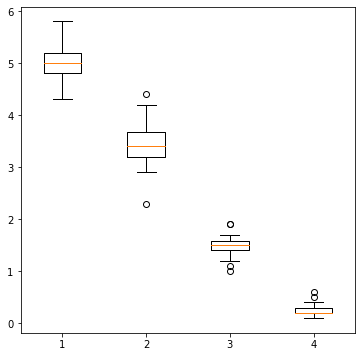

In [ ]:
plt.figure(figsize = (6, 6))
plt.boxplot(setosa.T)
plt.show()

In [ ]:
df.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

### 2. 학습과 테스트 데이터로 분리

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state = 2021             # train : test = 3 : 1
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [ ]:
np.unique(y_train, return_counts = True)

(array([0, 1, 2]), array([34, 36, 42]))

In [ ]:
# y값을 균등하게 뽑으려면 stratify 옵션을 설정해주어야 함
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify = iris.target, random_state = 2021
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [ ]:
np.unique(y_train, return_counts = True)

(array([0, 1, 2]), array([37, 37, 38]))

In [ ]:
# test size 비율을 20%로 설정
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify = iris.target, test_size = 0.2, random_state = 2021
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [ ]:
np.unique(y_train, return_counts = True)

(array([0, 1, 2]), array([40, 40, 40]))

### 3. 학습

- 결정 트리(Decision Tree)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# 모델 생성 - 객체 생성
dtc = DecisionTreeClassifier(random_state = 2022)

In [ ]:
# 모델 하이퍼 파라메터
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 2022,
 'splitter': 'best'}

In [ ]:
# 학습(훈련)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2022)

### 4. 예측

In [ ]:
pred_dt = dtc.predict(X_test)

In [ ]:
res = pd.DataFrame({'y':y_test, 'DT':pred_dt})
res.head()

,y,DT
0,0,0
1,1,1
2,1,2
3,2,2
4,0,0


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_dt)

0.9

In [ ]:
# 4, 5번을 한꺼번에 수행
dtc.score(X_test, y_test)

0.9

- Support Vector Machine(SVM)

In [57]:
# 3) 모델 생성 및 학습
from sklearn.svm import SVC
svc = SVC(random_state = 2022)
svc.fit(X_train, y_train)

SVC(random_state=2022)

In [59]:
# 4) 예측
pred_sv = svc.predict(X_test)

In [60]:
# 5) 평가
accuracy_score(y_test, pred_sv)

0.9

- Logistic Regression(로지스틱 회귀)

In [61]:
#) 모델 생성 및 학습
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(random_state = 2022, max_iter = 500)
lrc.fit(X_train,y_train)

LogisticRegression(max_iter=500, random_state=2022)

In [71]:
# 4) 예측
pred_lr = lrc.predict(X_test)

In [72]:
# 5) 평가
accuracy_score(y_test, pred_lr)

0.9333333333333333

- 3가지 모델 비교

In [73]:
dtc.score(X_test, y_test), svc.score(X_test, y_test), lrc.score(X_test,y_test)

(0.9, 0.9, 0.9333333333333333)

In [74]:
res['SV'] = pred_sv
res['LR'] = pred_lr
res.head()

,y,DT,SV,LR
0,0,0,0,0
1,1,1,1,1
2,1,2,1,1
3,2,2,2,2
4,0,0,0,0
